In [2]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/cd/43/b971880e2eb45c0bee2093710ae8044764a89afe9620df34a231c6f0ecd2/namex-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/08/e2/4c29cb9876456517f21979ddcbb6048f28a3b52c61aa9d14d42adafcdca4/dm_tree-0.1.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
 

In [4]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e5a5f4de9c3445dae08a530498e5c53b0e74410eeeb0991c79047/gast-0.5.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.7 MB/s eta 0:00:00
  Obtain

  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for rsa<5,>=3.1.4 from https://files.pythonhosted.org/packages/49/97/fa78e3d2f65c02c8e1268b9aba606569fe97f6c8f7c2d74394553347c145/rsa-4.9-py3-none-any.whl.metadata
  Obtaining dependency information for requests-oauthlib>=0.7.0 from https://files.pythonhosted.org/packages/6f/bb/5deac77a9af870143c684ab46a7934038a53eb4aa975bc0687ed6ca2c610/requests_oauthlib-1.3.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib>=3.0.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 19.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 M

In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
ruta_archivo = '/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/df_TS.csv'
df = pd.read_csv(ruta_archivo)
df

,DateTime,Estacion,ICA
0,2020-01-01 01:00:00,AltoRendimiento,29.0
1,2020-01-01 01:00:00,CarvajalSevillana,89.0
2,2020-01-01 01:00:00,Fontibon,66.0
3,2020-01-01 01:00:00,Guaymaral,39.0
4,2020-01-01 01:00:00,Kennedy,118.0
...,...,...,...
635731,2024-02-06 22:00:00,CarvajalSevillana,108.0
635732,2024-02-06 23:00:00,Bolivia,52.0
635733,2024-02-06 23:00:00,CarvajalSevillana,91.0
635734,2024-02-06 23:59:00,Bolivia,52.0


In [18]:
estaciones = df['Estacion'].unique()
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')
modelos_por_estacion = {}
resultados = {}  # Para almacenar los resultados de cada estación

Normalización de los datos: Es común normalizar los datos antes de alimentarlos a una red LSTM. Utiliza MinMaxScaler para normalizar la columna ICA entre 0 y 1.

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Paso 2: 

Creación de la secuencia de tiempo
Para una LSTM, necesitas crear secuencias de tiempo que serán tus datos de entrada. Por ejemplo, si quieres usar los últimos 30 días para predecir la calidad del aire de los próximos 5 días, deberías construir este tipo de secuencia.



In [19]:
n_pasados = 30  # Número de días pasados que usarás como entrada
n_futuros = 5   # Número de días futuros que quieres predecir

In [20]:
def crear_secuencias(data, n_pasados, n_futuros):
    X, y = [], []
    for i in range(n_pasados, len(data) - n_futuros +1):
        X.append(data[i - n_pasados:i])
        y.append(data[i + n_futuros - 1])
    return np.array(X), np.array(y)

# Configura los parámetros para las secuencias
n_pasados = 30
n_futuros = 5


# Paso 3: Construcción del Modelo LSTM

Para cada estación, construirás y entrenarás un modelo LSTM.



In [23]:
for estacion in estaciones:
    # Filtrar los datos por estación
    df_estacion = df[df['Estacion'] == estacion]
    
    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    ica_scaled = scaler.fit_transform(df_estacion['ICA'].values.reshape(-1,1))
    
    # Crear secuencias
    X, y = crear_secuencias(ica_scaled, n_pasados, n_futuros)
    print('np y',y)
    print('np x',X)
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Redimensionar X para que sea compatible con el modelo LSTM [muestras, pasos de tiempo, características]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Construir el modelo LSTM
    modelo = Sequential()
    modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_pasados, 1)))
    modelo.add(LSTM(50, activation='relu'))
    modelo.add(Dense(1))
    modelo.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    history = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    
    # Guardar el modelo y los resultados de la predicción para cada estación
    # modelo.save(f'modelo_{estacion}.h5')  # Descomenta esta línea si deseas guardar el modelo
    resultados[estacion] = modelo.evaluate(X_test, y_test)
    print('--------------------Estacion---------------------------------------')
    print(df_estacion)
    print(resultados[estacion])
    print('-----------------------------------------------------------')


Epoch 1/50
898/898 - 8s - loss: 0.0153 - val_loss: 0.0141 - 8s/epoch - 9ms/step
Epoch 2/50
898/898 - 7s - loss: 0.0139 - val_loss: 0.0142 - 7s/epoch - 8ms/step
Epoch 3/50
898/898 - 7s - loss: 0.0138 - val_loss: 0.0139 - 7s/epoch - 8ms/step
Epoch 4/50
898/898 - 7s - loss: 0.0137 - val_loss: 0.0146 - 7s/epoch - 8ms/step
Epoch 5/50
898/898 - 7s - loss: 0.0136 - val_loss: 0.0137 - 7s/epoch - 8ms/step
Epoch 6/50
898/898 - 7s - loss: 0.0135 - val_loss: 0.0137 - 7s/epoch - 8ms/step
Epoch 7/50
898/898 - 7s - loss: 0.0135 - val_loss: 0.0134 - 7s/epoch - 8ms/step
Epoch 8/50
898/898 - 7s - loss: 0.0134 - val_loss: 0.0131 - 7s/epoch - 8ms/step
Epoch 9/50
898/898 - 7s - loss: 0.0131 - val_loss: 0.0131 - 7s/epoch - 8ms/step
Epoch 10/50
898/898 - 7s - loss: 0.0130 - val_loss: 0.0143 - 7s/epoch - 8ms/step
Epoch 11/50
898/898 - 7s - loss: 0.0130 - val_loss: 0.0129 - 7s/epoch - 8ms/step
Epoch 12/50
898/898 - 7s - loss: 0.0129 - val_loss: 0.0130 - 7s/epoch - 8ms/step
Epoch 13/50
898/898 - 7s - loss: 0.01

Epoch 43/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0105 - 8s/epoch - 9ms/step
Epoch 44/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0105 - 8s/epoch - 9ms/step
Epoch 45/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0105 - 8s/epoch - 9ms/step
Epoch 46/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0106 - 8s/epoch - 9ms/step
Epoch 47/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0107 - 8s/epoch - 9ms/step
Epoch 48/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0103 - 8s/epoch - 9ms/step
Epoch 49/50
898/898 - 8s - loss: 0.0104 - val_loss: 0.0103 - 8s/epoch - 9ms/step
Epoch 50/50
898/898 - 8s - loss: 0.0103 - val_loss: 0.0103 - 8s/epoch - 9ms/step
225/225 [==============================] - 0s 2ms/step - loss: 0.0103
--------------------Estacion---------------------------------------
                              Estacion    ICA
DateTime                                     
2020-01-01 01:00:00  CarvajalSevillana   89.0
2020-01-01 02:00:00  CarvajalSevillana  141.0
2020-01-01 03:00:00  CarvajalS

898/898 - 8s - loss: 0.0111 - val_loss: 0.0120 - 8s/epoch - 8ms/step
Epoch 26/50
898/898 - 7s - loss: 0.0111 - val_loss: 0.0119 - 7s/epoch - 8ms/step
Epoch 27/50
898/898 - 7s - loss: 0.0111 - val_loss: 0.0118 - 7s/epoch - 8ms/step
Epoch 28/50
898/898 - 8s - loss: 0.0111 - val_loss: 0.0119 - 8s/epoch - 8ms/step
Epoch 29/50
898/898 - 7s - loss: 0.0110 - val_loss: 0.0120 - 7s/epoch - 8ms/step
Epoch 30/50
898/898 - 7s - loss: 0.0110 - val_loss: 0.0118 - 7s/epoch - 8ms/step
Epoch 31/50
898/898 - 7s - loss: 0.0110 - val_loss: 0.0119 - 7s/epoch - 8ms/step
Epoch 32/50
898/898 - 8s - loss: 0.0110 - val_loss: 0.0119 - 8s/epoch - 8ms/step
Epoch 33/50
898/898 - 8s - loss: 0.0110 - val_loss: 0.0121 - 8s/epoch - 8ms/step
Epoch 34/50
898/898 - 7s - loss: 0.0110 - val_loss: 0.0118 - 7s/epoch - 8ms/step
Epoch 35/50
898/898 - 7s - loss: 0.0110 - val_loss: 0.0118 - 7s/epoch - 8ms/step
Epoch 36/50
898/898 - 7s - loss: 0.0109 - val_loss: 0.0118 - 7s/epoch - 8ms/step
Epoch 37/50
898/898 - 8s - loss: 0.0109 

Epoch 9/50
898/898 - 7s - loss: 0.0117 - val_loss: 0.0117 - 7s/epoch - 8ms/step
Epoch 10/50
898/898 - 7s - loss: 0.0116 - val_loss: 0.0116 - 7s/epoch - 8ms/step
Epoch 11/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0117 - 7s/epoch - 8ms/step
Epoch 12/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0119 - 7s/epoch - 8ms/step
Epoch 13/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0119 - 7s/epoch - 8ms/step
Epoch 14/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0114 - 7s/epoch - 8ms/step
Epoch 15/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0115 - 7s/epoch - 8ms/step
Epoch 16/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0117 - 7s/epoch - 8ms/step
Epoch 17/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0113 - 7s/epoch - 8ms/step
Epoch 18/50
898/898 - 7s - loss: 0.0115 - val_loss: 0.0113 - 7s/epoch - 8ms/step
Epoch 19/50
898/898 - 7s - loss: 0.0114 - val_loss: 0.0114 - 7s/epoch - 8ms/step
Epoch 20/50
898/898 - 7s - loss: 0.0114 - val_loss: 0.0113 - 7s/epoch - 8ms/step
Epoch 21/50
898/898 - 8s - lo

225/225 [==============================] - 0s 2ms/step - loss: 0.0094
--------------------Estacion---------------------------------------
                        Estacion   ICA
DateTime                              
2020-01-01 01:00:00  MinAmbiente  29.0
2020-01-01 02:00:00  MinAmbiente  54.0
2020-01-01 03:00:00  MinAmbiente  58.0
2020-01-01 04:00:00  MinAmbiente  52.0
2020-01-01 05:00:00  MinAmbiente  80.0
...                          ...   ...
2024-02-05 20:00:00  MinAmbiente  68.0
2024-02-05 21:00:00  MinAmbiente  29.0
2024-02-05 22:00:00  MinAmbiente  64.0
2024-02-05 23:00:00  MinAmbiente  32.0
2024-02-05 23:59:00  MinAmbiente  19.0

[35928 rows x 2 columns]
0.009428060613572598
-----------------------------------------------------------
Epoch 1/50
898/898 - 8s - loss: 0.0203 - val_loss: 0.0194 - 8s/epoch - 9ms/step
Epoch 2/50
898/898 - 7s - loss: 0.0187 - val_loss: 0.0185 - 7s/epoch - 8ms/step
Epoch 3/50
898/898 - 7s - loss: 0.0177 - val_loss: 0.0170 - 7s/epoch - 8ms/step
Epoch 4/

Epoch 34/50
898/898 - 7s - loss: 0.0149 - val_loss: 0.0154 - 7s/epoch - 8ms/step
Epoch 35/50
898/898 - 7s - loss: 0.0149 - val_loss: 0.0152 - 7s/epoch - 8ms/step
Epoch 36/50
898/898 - 7s - loss: 0.0149 - val_loss: 0.0155 - 7s/epoch - 8ms/step
Epoch 37/50
898/898 - 7s - loss: 0.0149 - val_loss: 0.0153 - 7s/epoch - 8ms/step
Epoch 38/50
898/898 - 7s - loss: 0.0148 - val_loss: 0.0156 - 7s/epoch - 8ms/step
Epoch 39/50
898/898 - 7s - loss: 0.0148 - val_loss: 0.0154 - 7s/epoch - 8ms/step
Epoch 40/50
898/898 - 7s - loss: 0.0147 - val_loss: 0.0152 - 7s/epoch - 8ms/step
Epoch 41/50
898/898 - 7s - loss: 0.0147 - val_loss: 0.0156 - 7s/epoch - 8ms/step
Epoch 42/50
898/898 - 7s - loss: 0.0147 - val_loss: 0.0154 - 7s/epoch - 8ms/step
Epoch 43/50
898/898 - 7s - loss: 0.0146 - val_loss: 0.0151 - 7s/epoch - 8ms/step
Epoch 44/50
898/898 - 7s - loss: 0.0146 - val_loss: 0.0152 - 7s/epoch - 8ms/step
Epoch 45/50
898/898 - 7s - loss: 0.0146 - val_loss: 0.0151 - 7s/epoch - 8ms/step
Epoch 46/50
898/898 - 7s - l

Epoch 17/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0069 - 7s/epoch - 8ms/step
Epoch 18/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0072 - 7s/epoch - 8ms/step
Epoch 19/50
898/898 - 7s - loss: 0.0069 - val_loss: 0.0069 - 7s/epoch - 8ms/step
Epoch 20/50
898/898 - 7s - loss: 0.0073 - val_loss: 0.0088 - 7s/epoch - 8ms/step
Epoch 21/50
898/898 - 7s - loss: 0.0076 - val_loss: 0.0072 - 7s/epoch - 8ms/step
Epoch 22/50
898/898 - 8s - loss: 0.0071 - val_loss: 0.0071 - 8s/epoch - 9ms/step
Epoch 23/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0071 - 7s/epoch - 8ms/step
Epoch 24/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0071 - 7s/epoch - 8ms/step
Epoch 25/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0073 - 7s/epoch - 8ms/step
Epoch 26/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0070 - 7s/epoch - 8ms/step
Epoch 27/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0071 - 7s/epoch - 8ms/step
Epoch 28/50
898/898 - 7s - loss: 0.0070 - val_loss: 0.0070 - 7s/epoch - 8ms/step
Epoch 29/50
898/898 - 7s - l

Epoch 1/50
898/898 - 8s - loss: 0.0151 - val_loss: 0.0138 - 8s/epoch - 9ms/step
Epoch 2/50
898/898 - 7s - loss: 0.0139 - val_loss: 0.0142 - 7s/epoch - 8ms/step
Epoch 3/50
898/898 - 8s - loss: 0.0135 - val_loss: 0.0141 - 8s/epoch - 9ms/step
Epoch 4/50
898/898 - 7s - loss: 0.0133 - val_loss: 0.0129 - 7s/epoch - 8ms/step
Epoch 5/50
898/898 - 8s - loss: 0.0132 - val_loss: 0.0135 - 8s/epoch - 8ms/step
Epoch 6/50
898/898 - 7s - loss: 0.0132 - val_loss: 0.0132 - 7s/epoch - 8ms/step
Epoch 7/50
898/898 - 8s - loss: 0.0131 - val_loss: 0.0130 - 8s/epoch - 9ms/step
Epoch 8/50
898/898 - 8s - loss: 0.0131 - val_loss: 0.0133 - 8s/epoch - 8ms/step
Epoch 9/50
898/898 - 7s - loss: 0.0131 - val_loss: 0.0128 - 7s/epoch - 8ms/step
Epoch 10/50
898/898 - 8s - loss: 0.0131 - val_loss: 0.0134 - 8s/epoch - 8ms/step
Epoch 11/50
898/898 - 8s - loss: 0.0131 - val_loss: 0.0129 - 8s/epoch - 8ms/step
Epoch 12/50
898/898 - 8s - loss: 0.0130 - val_loss: 0.0131 - 8s/epoch - 8ms/step
Epoch 13/50
898/898 - 7s - loss: 0.01

Epoch 44/50
733/733 - 6s - loss: 0.0121 - val_loss: 0.0122 - 6s/epoch - 8ms/step
Epoch 45/50
733/733 - 6s - loss: 0.0121 - val_loss: 0.0123 - 6s/epoch - 8ms/step
Epoch 46/50
733/733 - 6s - loss: 0.0121 - val_loss: 0.0124 - 6s/epoch - 8ms/step
Epoch 47/50
733/733 - 6s - loss: 0.0120 - val_loss: 0.0128 - 6s/epoch - 8ms/step
Epoch 48/50
733/733 - 6s - loss: 0.0120 - val_loss: 0.0124 - 6s/epoch - 8ms/step
Epoch 49/50
733/733 - 6s - loss: 0.0120 - val_loss: 0.0122 - 6s/epoch - 8ms/step
Epoch 50/50
733/733 - 6s - loss: 0.0120 - val_loss: 0.0122 - 6s/epoch - 8ms/step
184/184 [==============================] - 0s 2ms/step - loss: 0.0122
--------------------Estacion---------------------------------------
                    Estacion   ICA
DateTime                          
2020-10-01 01:00:00   Jazmin  17.0
2020-10-01 02:00:00   Jazmin  18.0
2020-10-01 03:00:00   Jazmin  34.0
2020-10-01 04:00:00   Jazmin  37.0
2020-10-01 05:00:00   Jazmin  38.0
...                      ...   ...
2024-02-05 20:0

725/725 - 6s - loss: 0.0113 - val_loss: 0.0119 - 6s/epoch - 8ms/step
Epoch 29/50
725/725 - 6s - loss: 0.0113 - val_loss: 0.0117 - 6s/epoch - 8ms/step
Epoch 30/50
725/725 - 6s - loss: 0.0113 - val_loss: 0.0116 - 6s/epoch - 8ms/step
Epoch 31/50
725/725 - 6s - loss: 0.0112 - val_loss: 0.0117 - 6s/epoch - 8ms/step
Epoch 32/50
725/725 - 6s - loss: 0.0112 - val_loss: 0.0119 - 6s/epoch - 8ms/step
Epoch 33/50
725/725 - 6s - loss: 0.0112 - val_loss: 0.0118 - 6s/epoch - 8ms/step
Epoch 34/50
725/725 - 6s - loss: 0.0112 - val_loss: 0.0117 - 6s/epoch - 8ms/step
Epoch 35/50
725/725 - 6s - loss: 0.0111 - val_loss: 0.0116 - 6s/epoch - 8ms/step
Epoch 36/50
725/725 - 6s - loss: 0.0111 - val_loss: 0.0115 - 6s/epoch - 8ms/step
Epoch 37/50
725/725 - 6s - loss: 0.0111 - val_loss: 0.0115 - 6s/epoch - 8ms/step
Epoch 38/50
725/725 - 6s - loss: 0.0110 - val_loss: 0.0118 - 6s/epoch - 8ms/step
Epoch 39/50
725/725 - 6s - loss: 0.0111 - val_loss: 0.0116 - 6s/epoch - 8ms/step
Epoch 40/50
725/725 - 6s - loss: 0.0110 

Epoch 12/50
670/670 - 5s - loss: 0.0112 - val_loss: 0.0107 - 5s/epoch - 8ms/step
Epoch 13/50
670/670 - 5s - loss: 0.0112 - val_loss: 0.0110 - 5s/epoch - 8ms/step
Epoch 14/50
670/670 - 5s - loss: 0.0112 - val_loss: 0.0110 - 5s/epoch - 8ms/step
Epoch 15/50
670/670 - 6s - loss: 0.0112 - val_loss: 0.0109 - 6s/epoch - 8ms/step
Epoch 16/50
670/670 - 6s - loss: 0.0112 - val_loss: 0.0107 - 6s/epoch - 9ms/step
Epoch 17/50
670/670 - 6s - loss: 0.0112 - val_loss: 0.0107 - 6s/epoch - 8ms/step
Epoch 18/50
670/670 - 6s - loss: 0.0111 - val_loss: 0.0107 - 6s/epoch - 8ms/step
Epoch 19/50
670/670 - 5s - loss: 0.0111 - val_loss: 0.0107 - 5s/epoch - 8ms/step
Epoch 20/50
670/670 - 5s - loss: 0.0111 - val_loss: 0.0107 - 5s/epoch - 8ms/step
Epoch 21/50
670/670 - 6s - loss: 0.0111 - val_loss: 0.0108 - 6s/epoch - 8ms/step
Epoch 22/50
670/670 - 5s - loss: 0.0111 - val_loss: 0.0106 - 5s/epoch - 8ms/step
Epoch 23/50
670/670 - 5s - loss: 0.0111 - val_loss: 0.0108 - 5s/epoch - 8ms/step
Epoch 24/50
670/670 - 6s - l

In [27]:
resultados[estacion]

0.018531059846282005

X [[[0.1626506 ]
  [0.14457831]
  [0.18072289]
  ...
  [0.30120482]
  [0.24096386]
  [0.18072289]]

 [[0.14457831]
  [0.18072289]
  [0.30120482]
  ...
  [0.24096386]
  [0.18072289]
  [0.20481928]]

 [[0.18072289]
  [0.30120482]
  [0.51204819]
  ...
  [0.18072289]
  [0.20481928]
  [0.3253012 ]]

 ...

 [[0.38554217]
  [0.30120482]
  [0.29518072]
  ...
  [0.37349398]
  [0.3313253 ]
  [0.3313253 ]]

 [[0.30120482]
  [0.29518072]
  [0.29518072]
  ...
  [0.3313253 ]
  [0.3313253 ]
  [0.27108434]]

 [[0.29518072]
  [0.29518072]
  [0.23493976]
  ...
  [0.3313253 ]
  [0.27108434]
  [0.29518072]]]
y [[0.18072289]
 [0.22289157]
 [0.27710843]
 ...
 [0.27108434]
 [0.25903614]
 [0.3313253 ]]
Epoch 1/10
898/898 - 8s - loss: 0.0152 - val_loss: 0.0155 - 8s/epoch - 9ms/step
Epoch 2/10
898/898 - 7s - loss: 0.0139 - val_loss: 0.0139 - 7s/epoch - 8ms/step
Epoch 3/10
898/898 - 7s - loss: 0.0137 - val_loss: 0.0138 - 7s/epoch - 8ms/step
Epoch 4/10
898/898 - 7s - loss: 0.0136 - val_loss: 0.0134 - 7s/epoch - 8

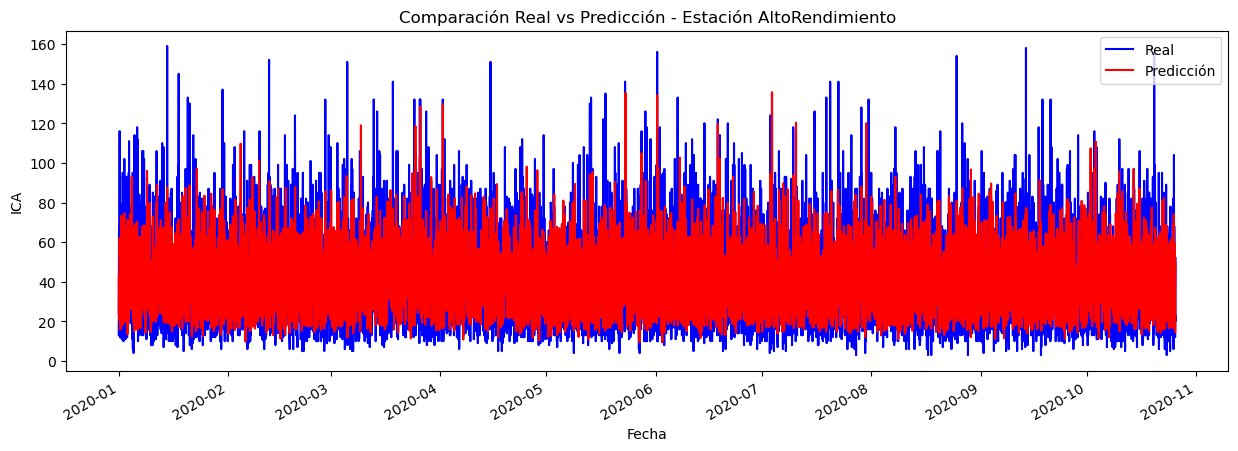

Resultados para la estación AltoRendimiento:
RMSE: 18.76183923950031, MSE: 352.0066116488536, MAPE: 47.55141775445746
-----------------------------------------------------------
Resultados consolidados por estación:


,Estacion,MSE,RMSE,MAPE
0,AltoRendimiento,352.006612,18.761839,47.551418


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

ruta_archivo = '/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/df_TS.csv'
df = pd.read_csv(ruta_archivo)
estaciones = df['Estacion'].unique()
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')
modelos_por_estacion = {}
resultados = {}  # Para almacenar los resultados de cada estación

def crear_secuencias(data, n_pasados, n_futuros):
    X, y = [], []
    for i in range(n_pasados, len(data) - n_futuros +1):
        X.append(data[i - n_pasados:i])
        y.append(data[i + n_futuros - 1])
    return np.array(X), np.array(y)

# Configura los parámetros para las secuencias
n_pasados = 30
n_futuros = 5
temp_results = []  # Usaremos una lista para recolectar DataFrames temporales
resultados_df = pd.DataFrame(columns=['Estacion', 'RMSE', 'MSE', 'MAPE'])
for estacion in estaciones:
    # Filtrar los datos por estación
    df_estacion = df[df['Estacion'] == estacion]
    # Establecer la fecha de inicio como la primera fecha en los datos de la estación actual
    start_date = df_estacion.index.min()  # Asumiendo que 'DateTime' es el índice después de set_index

    
    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    ica_scaled = scaler.fit_transform(df_estacion['ICA'].values.reshape(-1,1))
    
    # Crear secuencias
    X, y = crear_secuencias(ica_scaled, n_pasados, n_futuros)
    print("X",X)
    print("y",y)
    # Antes de la división en entrenamiento y prueba, guarda las fechas correspondientes:
    fechas_totales = df_estacion.index  # Asegúrate de que este índice sea el correcto para tus datos.

    # Después de crear las secuencias y dividir los datos, asigna las fechas de prueba:
    indices_test = range(len(X) - len(X_test), len(X))  # Calcula los índices de los datos de prueba.
    # Ajusta el rango de fechas para reflejar el periodo de los datos de prueba
    fechas_test = pd.date_range(start=start_date, periods=len(y_test_inv_flat), freq='H')

    #fechas_test = fechas_totales[indices_test]  # Selecciona las fechas de prueba correspondientes.

    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Redimensionar X para que sea compatible con el modelo LSTM [muestras, pasos de tiempo, características]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Construir el modelo LSTM
    modelo = Sequential()
    modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_pasados, 1)))
    modelo.add(LSTM(50, activation='relu'))
    modelo.add(Dense(1))
    modelo.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    history = modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    
    # Guardar el modelo y los resultados de la predicción para cada estación
    # modelo.save(f'modelo_{estacion}.h5')  # Descomenta esta línea si deseas guardar el modelo
    resultados[estacion] = modelo.evaluate(X_test, y_test)
    print('--------------------Estacion---------------------------------------')
    print(df_estacion)
    print(resultados[estacion])
    print('-----------------------------------------------------------')
    

    #Continuando desde tu ciclo for existente...
    
    # Preparación y entrenamiento del modelo como antes...

    # Guardar el modelo y los resultados de la predicción para cada estación
    # modelo.save(f'modelo_{estacion}.h5')  # Opcional: Descomenta esta línea si deseas guardar el modelo

    # Predicción con el conjunto de prueba
    y_pred = modelo.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test)  # Invertir la normalización para los valores reales
    y_pred_inv = scaler.inverse_transform(y_pred)  # Invertir la normalización para las predicciones

    # Calcular las métricas de error
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100

    y_test_inv_flat = y_test_inv.flatten()  # Convertir de forma (7179, 1) a (7179,)
    y_pred_inv_flat = y_pred_inv.flatten()  # Convertir de forma (7179, 1) a (7179,)


    # Al graficar, asegúrate de utilizar las fechas correctas:
    plt.figure(figsize=[15,5])
    plt.plot(fechas_test[:len(y_test_inv_flat)], y_test_inv_flat, label='Real', color='blue')  # Valores reales
    plt.plot(fechas_test[:len(y_pred_inv_flat)], y_pred_inv_flat, label='Predicción', color='red')  # Valores predichos
    plt.title(f'Comparación Real vs Predicción - Estación {estacion}')
    plt.xlabel('Fecha')
    plt.ylabel('ICA')
    plt.legend()
    plt.gcf().autofmt_xdate()  # Rota las fechas para que sean más legibles
    plt.show()

    # Almacenar los resultados
    temp_results.append(pd.DataFrame({'Estacion': [estacion], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape]}))

    # Imprimir resultados para la estación actual
    print(f'Resultados para la estación {estacion}:')
    print(f'RMSE: {rmse}, MSE: {mse}, MAPE: {mape}')
    print('-----------------------------------------------------------')
    break

    # Mostrar los resultados consolidados por estación
print('Resultados consolidados por estación:')
results = pd.concat(temp_results, ignore_index=True)
results



In [34]:
results

,Estacion,MSE,RMSE,MAPE
0,AltoRendimiento,363.996146,19.078683,46.934061
1,CarvajalSevillana,578.815456,24.058584,36.911147
2,Fontibon,400.621014,20.015519,36.992194
3,Guaymaral,362.120518,19.029464,44.827627
4,Kennedy,470.196140,21.684007,35.024373
5,LasFerias,360.106347,18.976468,47.165029
6,MinAmbiente,373.890500,19.336248,50.865997
7,MovilSeptima,486.636177,22.059832,46.910458
8,PuenteAranda,497.461282,22.303840,45.159522
9,SanCristobal,409.338687,20.232120,63.032367


In [49]:
# Ordenar por RMSE de menor a mayor (mejor rendimiento a peor)
sorted_by_rmse = results.sort_values(by='RMSE', ascending=True)
print("Ordenado por RMSE (mejor a peor):")
sorted_by_rmse

Ordenado por RMSE (mejor a peor):


,Estacion,MSE,RMSE,MAPE
17,Colina,249.021237,15.780407,42.521192
14,Usme,286.289718,16.920098,37.305261
12,Usaquen,314.206396,17.725868,42.039521
10,Suba,316.687509,17.795716,40.180386
15,Bolivia,326.403748,18.066647,39.659386
5,LasFerias,341.303032,18.474389,42.362791
13,Jazmin,352.479706,18.774443,41.597433
0,AltoRendimiento,357.317138,18.902834,50.371171
3,Guaymaral,359.885053,18.970637,47.690523
6,MinAmbiente,373.724034,19.331943,52.302621
